---------
- # 요약
    - 새로운 내용임
    - 개요 참조
---------

# 13. Generative Models

## 비지도 학습(Unsupervised Learning)
- 데이터만 존재하는 데이터에 대한 학습임
    - train_y 가 없음
- 데이터의 분포, 내포하는 논리적 구조, 형태를 학습하는 모델임
- 데이터 확보가 훨씬 저렴함



### PixelRNN, PixelCNN
- 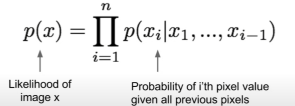
    - 이전 픽셀값으로 다음픽셀값 예측함
- PixelRNN
    - 과정
        1. 한쪽 구석에서 시작함
        2. 순차적으로 주변 픽셀을 생성함
    - 순차적이고 느림
    - 이전 레이어의 은닉층을 다음 픽셀 예측에 사용되므로 학습 시에 병렬처리가 불가능함
- PixelCNN
    - 동일하게 구석 코너에서부터 생성을 시작함
    - CNN 활용해서 픽셀 생성함
    - 학습 시에는 병렬처리가 가능하므로 더 빠른 학습이 가능함
    - 생성 시에는 여전히 순차적인 연산이 필요함
- 병렬 처리 관련 단점때문에 현재는 diffusion model, gan 활용함


### Variational  Auto encoder (VAE)
- 잠재 변수 모델
- 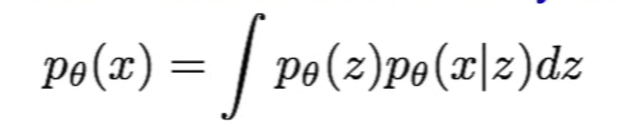
    - 픽셀에 대한 예측을 적분의 형태로 표현함
    - 확률론적인 접근방식임
    - 현실적인 제약 내에 구할수 있는 방법이 사실상 존재하지 않으므로 Varieational Inference 사용해 구함
- Auto Encoder
    - 입력 데이터를 압축했다가 다시 복원하는 신경망임
    - 인코더
        - 입력 데이터를 받아 적은 차원으로 압축해 잠재 표현으로 변환함
        - 압축하는 과정에서 입력 데이터의 중요한 특징만 남게 되며, 디코딩에 활용됨
    - 디코더
        - 잠재 표현을 입력받아 다시 원래대로 복원하는 신경망임
    - 과정
        1. 입력 데이터를 4개의 레이어의 conv연산을 하는 디코더에 전달
            - 잠재표현을 $z$ 로 표기함
        2. 출력된 잠재 표현을 복원하는 디코더에 전달해 4개 레이어의 upconv 연산을 함
        3. 최종적으로 다시 복원된 이미지를 출력함
        - 해당 데이터를 통해 L2 손실함수를 원본 이미지와 대조해 계산함
        - 신경망을 학습시킨 뒤 디코더 부분을 버리고, 인코더를 피처 매핑을 생성하는 인코더로 사용함

- VAE 에서 생성된 잠재 표현을 통해 새로운 형태의 이미지를 생성할 수 있음
- 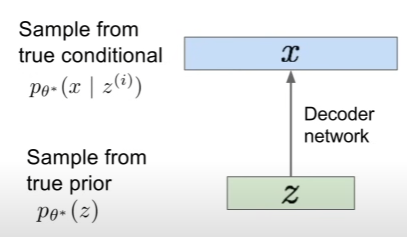
    - 잠재표현 z 로부터 이미지를 생성하는 디코더 네트워크를 정의함
    - 해당 모델의 수식은 다음과 같음
        - 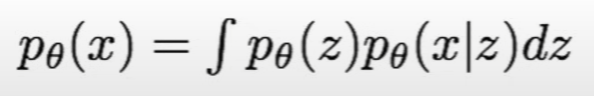
        - 해당 수식은 확률적인 변수이기때문에 미분이 불가능해 reparameterization trick 활용함

- 유사도 수식 유도
    - 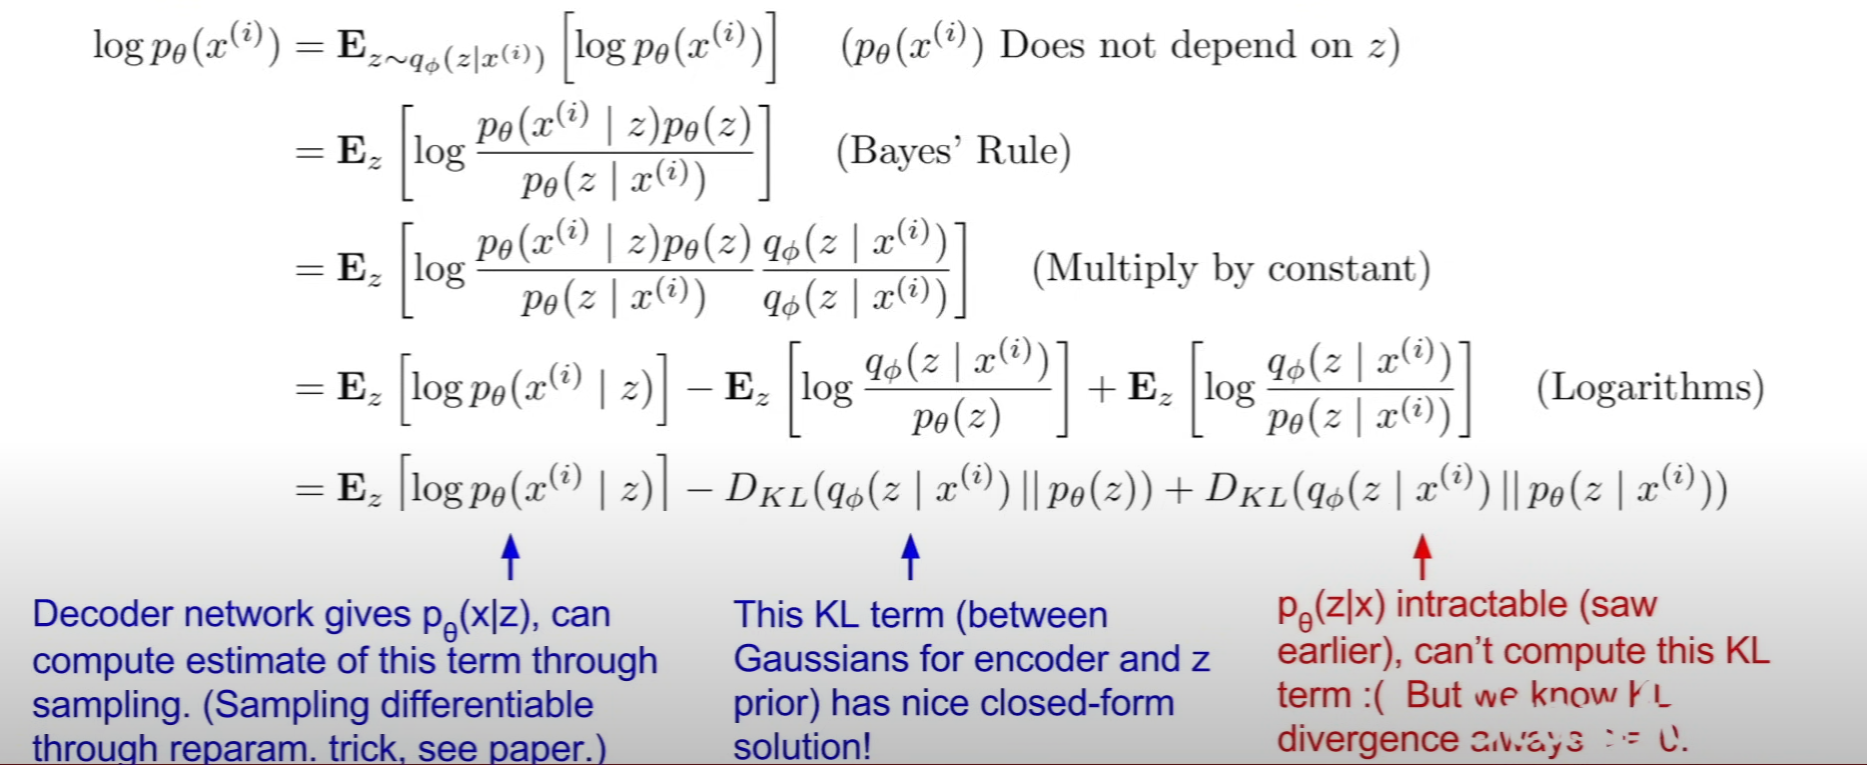
    - 가우시안 유사도 사용
    - 유사도 수식을 세 파트로 변형함
        - Reparameterization trick 를 활용해 디코더에서 제공하는 첫부분
        - 계산가능한 닫힌 형태의 KL 다이버전스
        - 계산불가능하나 0보다 크거나 같은 KL 다이버전스 항, 무시함
        - 1,2번 항을 합쳐서 ELBO 이라고 하고, 이 항을 최대화해야함
            - 1번항 최대화하고, 2번항 최소화해야함
                - 원본 데이터를 복원하고, 새로운 데이터는 원본과 분포가 비슷해야함
- 전체 훈련 과정
    - 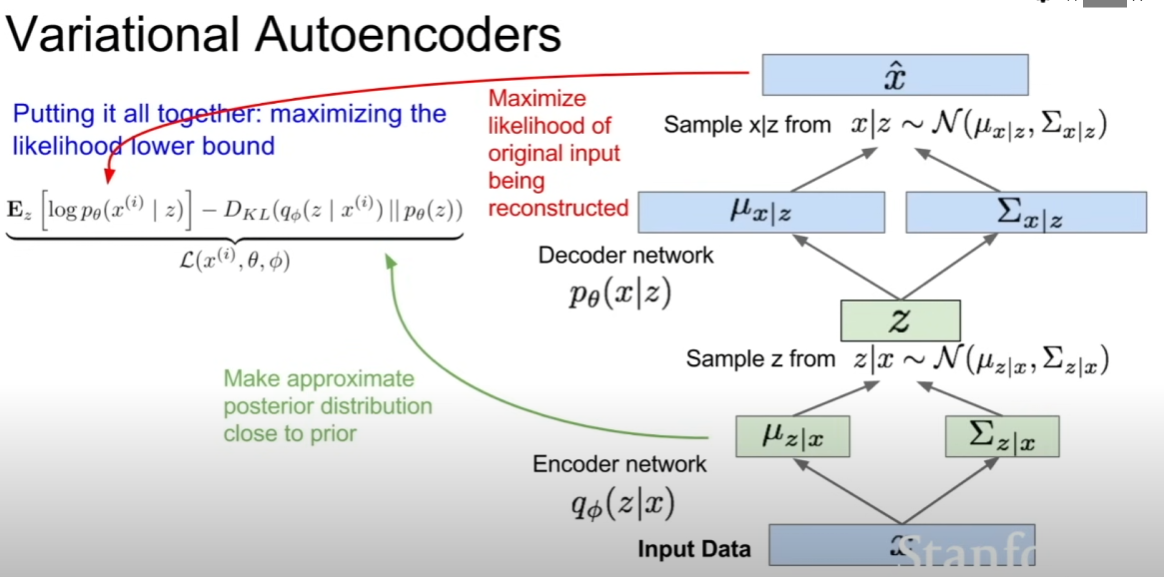
    - 인코딩 중 다이버전스 부분 계산
    - 디코딩 후 첫 항 계산
    - 구해진 비용함수로 역전파하고 업데이트


- 데이터 생성 과정
    - 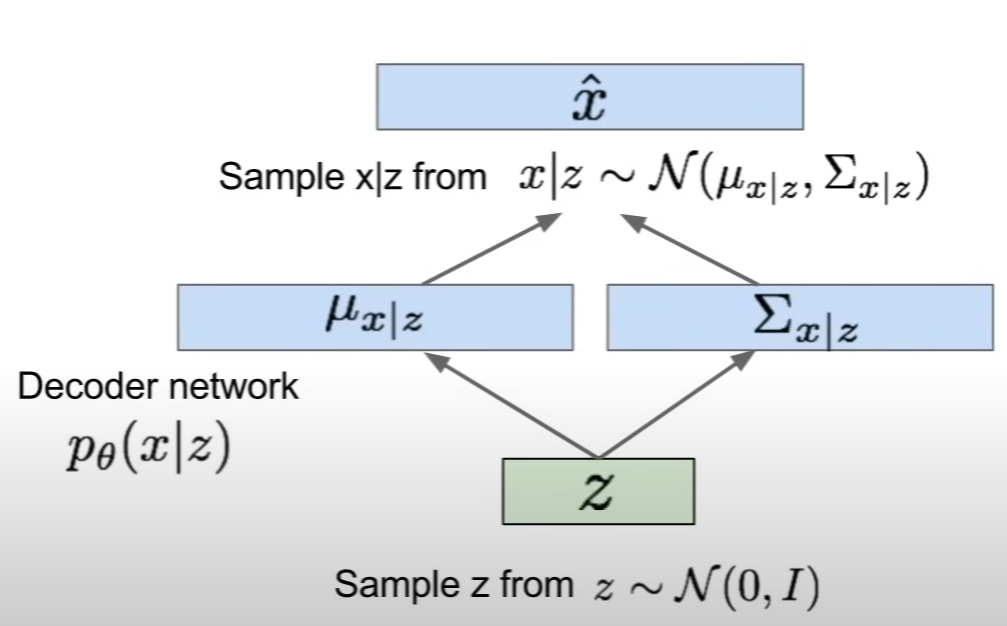
    - 샘플링된 잠재표현에서 추정 $\hat{x}$의 확률분포에 대한 평균, 분산을 찾은 후 이 분포를 통해 샘플링한다

- Reparameterization Trick
    - 인코더가 출력한 분포 $\mu, \sigma$ 와 외부변수 $\epsilon$ 을 사용해 결정적인 샘플링 값을 생성함
    - $\epsilon$ 은 정규분포 $N(0,1)$ 에서 무작위로 샘플링됨.
    - 확률변수가 결정적인 형태로 변환되기 때문에 미분가능하게 바뀌어 역전파가 가능해짐


## GAN
- 단순하고 랜덤한 노이즈로부터 이미지를 생성하는 생성자, 이 생성된 이미지와 원본 이미지를 구분하는 판별자를 경쟁적으로 학습시킴
    - $min_G max_D V(D, G) = E[log(D(x))] + E[log(1 - D(G(z)))]$
    - 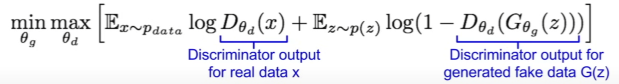
    - 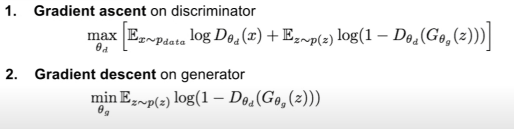
        - 위 수식을 판별자, 생성자로 분리함
        - 단 이 경우 생성자의 학습속도가 초기에는 느리고 나중에 빨라지므로(충분한 수준에 도달하기 전에는 판별속도가 월등히 빠름)
    - 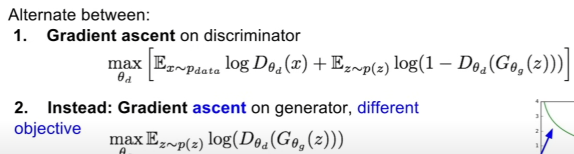
        - 오답률을 최대화하는 방식으로 생성자를 뒤집어 사용함
- 생성자는 판별자를 속이려 더욱 유사한 이미지를,
- 판별자는 가짜 데이터를 구분하기 위하여 더 정교한 구분법을 정의하므로, 과정에서 더욱 정교한 이미지를 생성하게됨
- 수도코드
    - 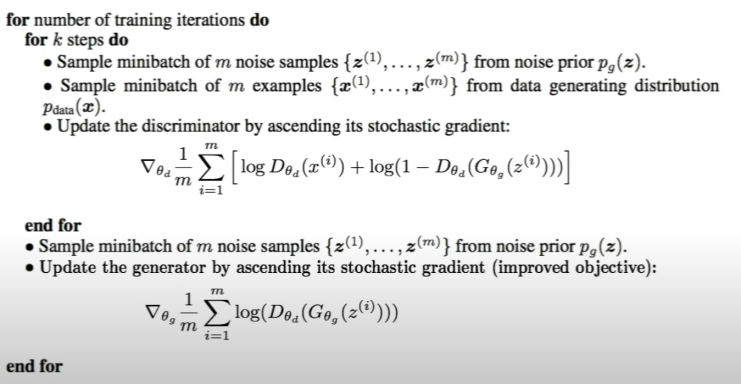

# 14. Deep Reinforcement Learning
